<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Борис! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, сгрупированы по функциональности. Можно ещё разделить группы пустой строкой.</font>

In [2]:
gold_industry_train = pd.read_csv(
    "/datasets/gold_industry_train.csv",
)
gold_industry_test = pd.read_csv(
    "/datasets/gold_industry_test.csv",
)
gold_industry_full = pd.read_csv("/datasets/gold_industry_full.csv")

In [3]:

gold_industry_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [4]:

gold_industry_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [5]:

gold_industry_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


Изучим данные методом describe

In [6]:
display(gold_industry_train.describe())

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


In [7]:
display(gold_industry_test.describe())

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


In [8]:
display(gold_industry_full.describe())

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


посмотрим уникальные значения

In [9]:
gold_industry_train.nunique()

date                      14579
rougher.input.feed_au     14556
rougher.input.feed_ag     14556
rougher.input.feed_pb     14480
rougher.input.feed_sol    14469
                          ...  
final.output.recovery     14399
final.output.tail_au      14493
final.output.tail_ag      14492
final.output.tail_pb      14418
final.output.tail_sol     14488
Length: 87, dtype: int64

In [10]:
gold_industry_test.nunique()

date                                          4860
rougher.input.feed_au                         4857
rougher.input.feed_ag                         4857
rougher.input.feed_pb                         4827
rougher.input.feed_sol                        4834
rougher.input.feed_rate                       4856
rougher.input.feed_size                       4811
rougher.input.floatbank10_sulfate             4857
rougher.input.floatbank10_xanthate            4859
rougher.state.floatbank10_a_air               4859
rougher.state.floatbank10_a_level             4859
rougher.state.floatbank10_b_air               4859
rougher.state.floatbank10_b_level             4859
rougher.state.floatbank10_c_air               4859
rougher.state.floatbank10_c_level             4859
rougher.state.floatbank10_d_air               4860
rougher.state.floatbank10_d_level             4860
rougher.state.floatbank10_e_air               4853
rougher.state.floatbank10_e_level             4860
rougher.state.floatbank10_f_air

In [11]:
gold_industry_full.nunique()

date                      19439
rougher.input.feed_au     19409
rougher.input.feed_ag     19409
rougher.input.feed_pb     19300
rougher.input.feed_sol    19292
                          ...  
final.output.recovery     19235
final.output.tail_au      19329
final.output.tail_ag      19328
final.output.tail_pb      19228
final.output.tail_sol     19322
Length: 87, dtype: int64

Проверим количество дупликатов

In [12]:
print('Тестовая выборка: ',gold_industry_test.duplicated().sum())
print('Обучающая выборка: ',gold_industry_train.duplicated().sum())
print('Все данные: ',gold_industry_full.duplicated().sum())

Тестовая выборка:  0
Обучающая выборка:  0
Все данные:  0


<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

Рассчитаем MAE

In [13]:
def industry(row):
    
    industry = (row['rougher.output.concentrate_au']*(row['rougher.input.feed_au']-row['rougher.output.tail_au']) ) / (
        row['rougher.input.feed_au']*(row['rougher.output.concentrate_au']-row['rougher.output.tail_au']) * 0.01)
    return industry
       

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='green'>Расчёт верный!</font>

In [14]:
gold_industry_train['industry'] = gold_industry_train.apply(industry, axis=1)
gold_industry_train['industry'].mean()

82.52119968211336

In [15]:
mean_absolute_error(gold_industry_train['rougher.output.recovery'], gold_industry_train['industry'])

1.1201989637311238e-14

MAE между признаком и рассчетами небольшое, данные впорядке

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='green'>👍</font>

Напишем функцию, с помощью которой проанализируем каких признаков не хватает в тестовой выборке

In [16]:
e = []
for i in gold_industry_train.columns:
    if i not in gold_industry_test.columns:
        e.append(i)

e


['rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'final.output.concentrate_au',
 'final.output.concentrate_ag',
 'final

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ⚠️\
<font color='darkorange'> Можно определить разницу в колонках без цикла: вычтя один сэт колонок из другого или с помощью метода difference.</font>

В тестовой выборке не хватает данных:
final, primary_cleaner и secondary_cleaner


In [17]:
gold_industry_test = gold_industry_test.merge(
    gold_industry_full[["date", "rougher.output.recovery", "final.output.recovery"]],
    on="date",
    how="left",
)

<font color='blue'><b>Комментарий ревьюера 9: </b></font> ✔️\
<font color='green'> Верно, при объединении таблиц нужно привязаться ко времени наблюдения.</font>

In [18]:
gold_industry_train = gold_industry_train.bfill()
gold_industry_test = gold_industry_test.bfill()
gold_industry_full = gold_industry_train.bfill()


<font color='blue'><b>Комментарий ревьюера 9: </b></font> ⚠️\
<font color='darkorange'> Заполнение пропусков одним значением не совсем корректно. В задаче есть условие,что соседние данные похожи. Можно использовать метод `ffill`</font>

In [19]:
gold_industry_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,industry
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297,87.107763
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514,86.843261
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849,86.842308
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835,87.226430
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686,86.688794


<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='green'> Пропуски заполнены согласно условию задачи!</font>

In [20]:
gold_industry_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575,89.514960,70.281454
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126,65.523246
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155,91.816623,74.817644
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973,88.478959,63.082720
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805,89.230316,74.463380


Вывод:
Данные загружены, проверены основные показатели методом describe, найдены уникальные значения, посчитана MAE, 
а также заполнены пропуски методом интерполяции(гуглил его применение)

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️ <br>
<font color='green'>Здорово, что не забываешь про промежуточные выводы.</font>

## Анализ данных

In [21]:
def hist_concentrate(final, primary, rougher, raw, name):
    plt.hist(final, bins=300, alpha=0.7, label='Final')
    plt.hist(primary, bins=300, alpha=0.7, label='Primary cleaner')
    plt.hist(rougher, bins=300, alpha=0.7, label='Rougher')
    plt.hist(raw, bins=300, alpha=0.7, label='Raw')
    plt.title(name)
    plt.legend()
    plt.show()

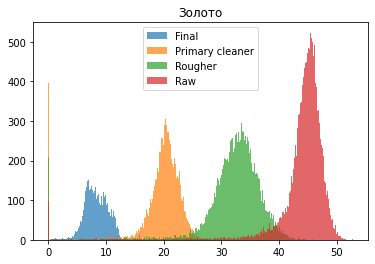

In [22]:
hist_concentrate(gold_industry_full['rougher.input.feed_au'],
           gold_industry_full['rougher.output.concentrate_au'],
           gold_industry_full['primary_cleaner.output.concentrate_au'],
           gold_industry_full['final.output.concentrate_au'],'Золото')

Концентрация золота увеличивается на каждом этапе обработке, особенно важен первый и финальный этап

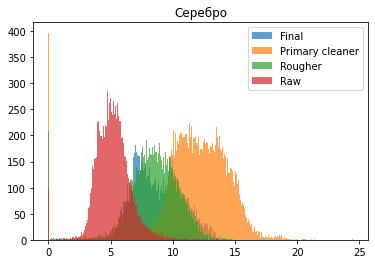

In [23]:
hist_concentrate(gold_industry_full['rougher.input.feed_ag'],
           gold_industry_full['rougher.output.concentrate_ag'],
           gold_industry_full['primary_cleaner.output.concentrate_ag'],
           gold_industry_full['final.output.concentrate_ag'],'Серебро')

у серебра достаточно интересная картина финальные значения имеют меньше серебра чем 2 и 3 этапы отчистки

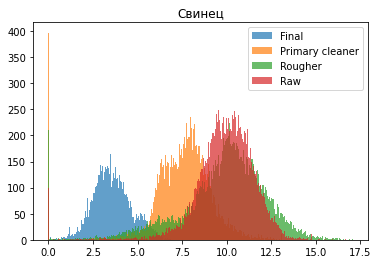

In [24]:
hist_concentrate(gold_industry_full['rougher.input.feed_pb'],
           gold_industry_full['rougher.output.concentrate_pb'],
           gold_industry_full['primary_cleaner.output.concentrate_pb'],
           gold_industry_full['final.output.concentrate_pb'],'Свинец')

концентрация свинца также уменьшается с каждым этапом отчистки

Около нуля замечены аномальные выбросы

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ❌\
<font color='red'>~~Нужно описать:~~ `как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.`</font>

+

<font color='blue'><b>Комментарий ревьюера 4: </b></font> ✔️\
<font color='green'> Всё верно!</font>

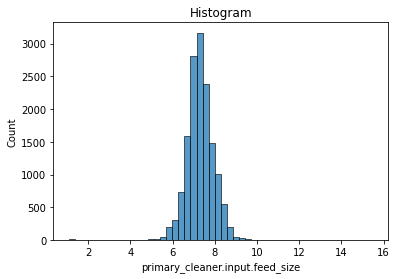

In [25]:
sns.histplot(gold_industry_train['primary_cleaner.input.feed_size'], bins=50);
plt.title("Histogram");


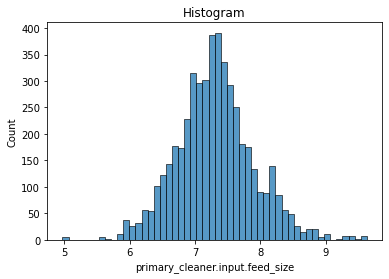

In [26]:
sns.histplot(gold_industry_test['primary_cleaner.input.feed_size'], bins=50);
plt.title("Histogram");

средние данных тестовой и тренировочной выборок не отличаются

<font color='blue'><b>Комментарий ревьюера 4: </b></font> ✔️\
<font color='green'> 👍</font>

Исследуем суммарную концентрацию всех веществ на разных стадиях

In [27]:
features_rough = ['rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb']
features_input = ['rougher.input.feed_au', 'rougher.input.feed_ag','rougher.input.feed_pb']
features_primary = ['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb']
features_final = ['final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb']
display(gold_industry_test.shape)
display(gold_industry_train.shape)

gold_industry_train = gold_industry_train[gold_industry_train[features_input].sum(1) > 0]
gold_industry_train = gold_industry_train[gold_industry_train[features_rough].sum(1) > 0]
gold_industry_train = gold_industry_train[gold_industry_train[features_primary].sum(1) > 0]
gold_industry_train = gold_industry_train[gold_industry_train[features_final].sum(1) > 0]



display(gold_industry_test.shape)
display(gold_industry_train.shape)


(4860, 55)

(14579, 88)

(4860, 55)

(13988, 88)

Вывод: выборки одинакового размера, нулевые значнеия удалены

## Модель

напишем функцию Smape

In [28]:
def smape(target, predictions):
    

    n = np.abs(target - predictions)
    d = (np.abs(target) + np.abs(predictions)) / 2 
    return 1 / len(target) * np.sum(n/d) * 100               
                                    
def final_smape(target, predictions):
    target_rougher = target['rougher.output.recovery']
    target_final = target['final.output.recovery']
    target_predictions_rougher = predictions[:, 0]
    target_predictions_final = predictions[:, 1]
                                    
    return 0.25 * smape(target_rougher, target_predictions_rougher) + 0.75 * smape(target_rougher, target_predictions_rougher)

smape_scorer = make_scorer(final_smape, greater_is_better = False)

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Ошибка в расчёте smape. На 2 нужно разделить только знаменатель~~.</font>

+

In [29]:
gold_industry_test.shape

(4860, 55)

In [30]:
gold_industry_train = gold_industry_train[gold_industry_test.columns]

In [31]:
gold_industry_train.shape

(13988, 55)

In [32]:
gold_industry_test.shape

(4860, 55)

In [33]:
gold_industry_test = gold_industry_test.drop(['date'], axis=1)

In [34]:
gold_industry_train = gold_industry_train.drop('date', axis=1)

<font color='blue'><b>Комментарий ревьюера 4: </b></font> ❌\
<font color='red'> ~~В обучающих данных должно остаться 52 признака как в тестовой выборке.~~</font>

In [35]:
features_train = gold_industry_train.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)
target_train = gold_industry_train[["rougher.output.recovery", "final.output.recovery"]]

features_test = gold_industry_test.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)
target_test = gold_industry_test[["rougher.output.recovery", "final.output.recovery"]]

In [36]:
model_LR = LinearRegression()
scores = cross_val_score(model_LR, features_train, target_train, cv=5, scoring=smape_scorer)
final_score = scores.mean()
final_score

-7.049388614090033

теперь попробуем через подбор параметров

In [37]:
param_grid = {'max_depth': range(1, 100, 12)}
model_DTR = DecisionTreeRegressor(random_state=12345)
search = GridSearchCV(model_DTR, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train)
search.best_score_

-7.129912196258376

In [38]:
target_test.head()

,rougher.output.recovery,final.output.recovery
0,89.514960,70.281454
1,89.858126,65.523246
2,91.816623,74.817644
3,88.478959,63.082720
4,89.230316,74.463380


<font color='blue'><b>Комментарий ревьюера 7: </b></font> ❌\
<font color='blue'> Написал выше.</font>

Исправлено

In [39]:
model_rfr = RandomForestRegressor(random_state=12345)
score_rougher_rfr = cross_val_score(model_rfr, features_train, target_train, cv=5, scoring=smape_scorer).mean()
score_rougher_rfr

-6.959270458071534

Лучший показатель у RandomForest, сделаем тест на нем

In [40]:
model = RandomForestRegressor(random_state=12345)
model.fit(features_train, target_train)
test_predictions = model.predict(features_test)
print('Итоговое sMAPE на тестовой выборке:',smape(target_test, test_predictions).mean())

Итоговое sMAPE на тестовой выборке: 4.335097264993704


Проверим модель также на устойчивость

In [41]:

dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(features_train, target_train)
test_predictions = dummy_model.predict(features_test)


print('Итоговое sMAPE для DummyRegressor:',smape(target_test, test_predictions).mean())

Итоговое sMAPE для DummyRegressor: 7.684543208005756


<font color='blue'><b>Комментарий ревьюера 8: </b></font> ✔️\
<font color='green'> Классно, что сравниваешь с константной моделью!</font>

<font color='blue'><b>Комментарий ревьюера 7: </b></font> \
<font color='blue'> Не забудь сравнить с константной моделью, например с `DummyRegressor`, из одного значения метрики не ясно насколько адекватно предсказание моделей. )</font>

 Вывод: Данные проанализированы. Заполнены пропуски средним значениями, в тестовую выборку добавлены столбцы из обучающей выборки

Проверено изменение концентрации металлов на каждом этапе очистки.

Написана функция для вычисления итоговой Smape, модели обучены линейной регрессией и Деревом решений, лучшая модель посчитана на тестовоф выборке


<font color='blue'><b>Комментарий ревьюера 8: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера 9</b></font>\
<font color='green'> Борис, проект принят! \
Все этапы пройдены. Все критичные рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Борис, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Поправь тестовые таргеты.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='darkorange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 7</b></font>

<font color='blue'>К сожалению, проект не готов. Присылай законченную версию. По всем непонятным моментам можно обращаться за помощью наставникам и преподавателям, а также комьюнити студентов. Буду ждать :)

</font>

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке